In [239]:
import pandas as pd
import seaborn as sns
import nltk
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from nltk.stem.porter import PorterStemmer
from nltk.corpus import stopwords
import string
from wordcloud import WordCloud
from collections import Counter
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
# from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score,precision_score
import pickle


In [2]:
df = pd.read_csv(r"D:\Datasets\spam.csv", encoding='ISO-8859-1')

In [3]:
df.head(3)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN


In [4]:
df.isnull().sum()

v1               0
v2               0
Unnamed: 2    5522
Unnamed: 3    5560
Unnamed: 4    5566
dtype: int64

In [5]:
df.drop(columns=["Unnamed: 2","Unnamed: 3","Unnamed: 4"],inplace=True)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   v1      5572 non-null   object
 1   v2      5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [7]:
df.rename(columns={"v1":"output","v2":"Data"},inplace=True)

In [8]:
df.isnull().sum().sum()

0

In [9]:
df.duplicated().sum()

403

In [10]:
df=df.drop_duplicates(keep="first")

<Axes: xlabel='output', ylabel='count'>

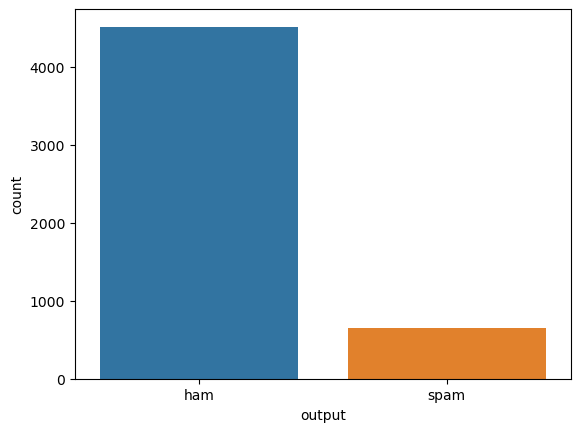

In [11]:
sns.countplot(x=df["output"],hue=df["output"])

In [12]:
df["characters"]=df["Data"].apply(len)

In [13]:
df["words"]=df["Data"].apply(lambda x:len(x.split()))

In [14]:
df.head()

,output,Data,characters,words
0,ham,"Go until jurong point, crazy.. Available only ...",111,20
1,ham,Ok lar... Joking wif u oni...,29,6
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,28
3,ham,U dun say so early hor... U c already then say...,49,11
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,13


In [15]:
df[df["output"]=="ham"][["characters","words"]].describe()

,characters,words
count,4516.000000,4516.000000
mean,70.459256,14.134632
std,56.358207,11.116240
min,2.000000,1.000000
25%,34.000000,7.000000
50%,52.000000,11.000000
75%,90.000000,18.000000
max,910.000000,171.000000


In [16]:
df[df["output"]=="spam"][["characters","words"]].describe()

,characters,words
count,653.000000,653.000000
mean,137.891271,23.681470
std,30.137753,5.967672
min,13.000000,2.000000
25%,132.000000,22.000000
50%,149.000000,25.000000
75%,157.000000,28.000000
max,224.000000,35.000000


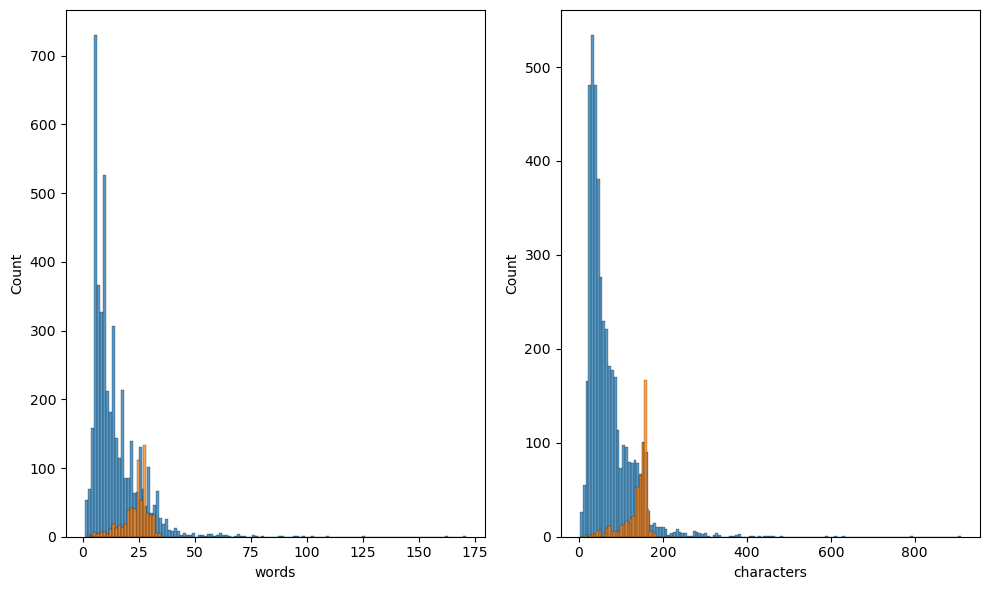

In [17]:
plt.figure(figsize=(10,6))

plt.subplot(1,2,1)
sns.histplot(df[df["output"]=="ham"]["words"])
sns.histplot(df[df["output"]=="spam"]["words"])

plt.subplot(1,2,2)
sns.histplot(df[df["output"]=="ham"]["characters"])
sns.histplot(df[df["output"]=="spam"]["characters"])

plt.tight_layout()
plt.show()

In [18]:
plt.figure(figsize=(10,6))



<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

In [19]:
le=LabelEncoder()
df["output"]=le.fit_transform(df["output"])

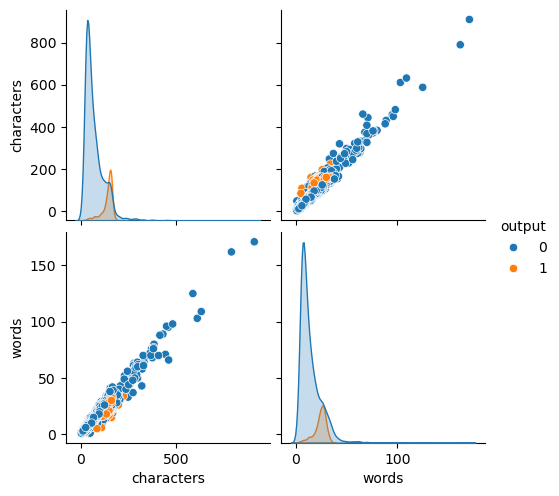

In [20]:
sns.pairplot(df,hue="output")

<Axes: >

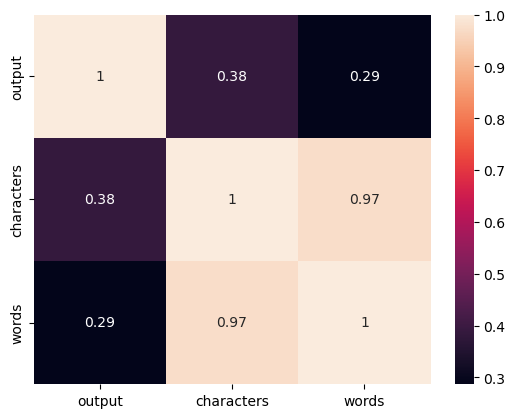

In [21]:
sns.heatmap(df.corr(numeric_only=True),annot=True)

In [22]:
df

,output,Data,characters,words
0,0,"Go until jurong point, crazy.. Available only ...",111,20
1,0,Ok lar... Joking wif u oni...,29,6
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,28
3,0,U dun say so early hor... U c already then say...,49,11
4,0,"Nah I don't think he goes to usf, he lives aro...",61,13
...,...,...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...,161,30
5568,0,Will Ì_ b going to esplanade fr home?,37,8
5569,0,"Pity, * was in mood for that. So...any other s...",57,10
5570,0,The guy did some bitching but I acted like i'd...,125,26


In [24]:
ps=PorterStemmer()

In [54]:
def transformation(x):
    x=x.lower()
    x=x.split()
    y=[]
    for i in x:
        if i.isalpha():
            y.append(i)
    z=y[:]
    y.clear()
    for i in z:
        if i not in stopwords.words("english") and i not in string.punctuation:
            y.append(i)
    z=y[:]
    y.clear()
    y=[]
    for i in z:
        y.append(ps.stem(i))
    return " ".join(y)       

In [59]:
df["new_Data"]=df["Data"].apply(transformation)

In [60]:
df

,output,Data,characters,words,new_Data
0,0,"go until jurong point, crazy.. avail onli in b...",111,20,go jurong avail onli bugi n great world la e c...
1,0,ok lar... joke wif u oni...,29,6,ok joke wif u
2,1,free entri in 2 a wkli comp to win fa cup fina...,155,28,free entri wkli comp win fa cup final tkt may ...
3,0,u dun say so earli hor... u c alreadi then say...,49,11,u dun say earli u c alreadi
4,0,"nah i don't think he goe to usf, he live aroun...",61,13,nah think goe live around though
...,...,...,...,...,...
5567,1,thi is the 2nd time we have tri 2 contact u. u...,161,30,thi time tri contact u pound claim call onli per
5568,0,will ì_ b go to esplanad fr home?,37,8,b go esplanad fr
5569,0,"pity, * wa in mood for that. so...ani other su...",57,10,wa mood
5570,0,the guy did some bitch but i act like i'd be i...,125,26,guy bitch act like interest buy someth el next...


In [84]:
wc=WordCloud(width=490,height=490,min_font_size=3,background_color="white")

In [85]:
spam=wc.generate(df[df["output"]==1]["new_Data"].str.cat(sep=" "))

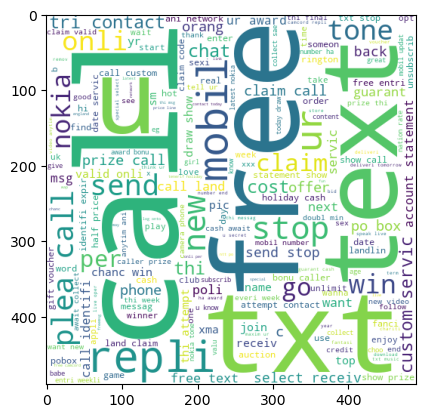

In [86]:
plt.imshow(spam)

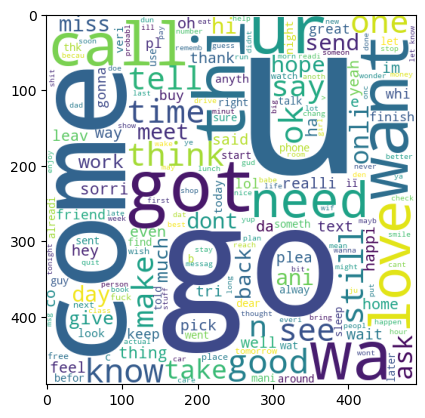

In [89]:
not_spam=wc.generate(df[df["output"]==0]["new_Data"].str.cat(sep=" "))
plt.imshow(not_spam)

In [97]:
list_=df[df["output"]==1]["new_Data"].to_list()
x=[]
for msg in list_:
   for word in msg.split():
       x.append(word)

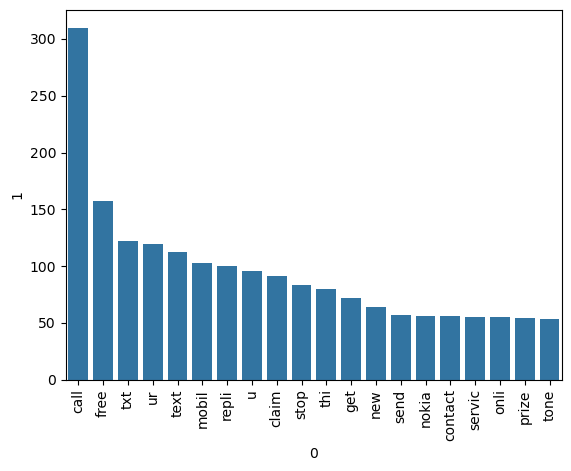

In [123]:
sns.barplot(x=pd.DataFrame(Counter(x).most_common(20))[0],y=pd.DataFrame(Counter(x).most_common(20))[1])
plt.xticks(rotation="vertical")
plt.show()

In [156]:
cv=CountVectorizer()

In [171]:
embeddings=cv.fit_transform(df["new_Data"]).toarray()

In [164]:
cv.get_feature_names_out()

array(['aa', 'aah', 'aaniy', ..., 'åòharri', 'åôrent', 'ìï'], dtype=object)

In [173]:
X=embeddings
y=df["output"].values

In [179]:
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [201]:
lr=LogisticRegression(solver="liblinear",penalty="l1")
svc=SVC(kernel="sigmoid",gamma=1.0)
knn= KNeighborsClassifier(n_neighbors=11)
dt=DecisionTreeClassifier(max_depth=8)
rf=RandomForestClassifier(n_estimators=100,random_state=45)
gb = GradientBoostingClassifier(n_estimators=50,random_state=2)
xgb = XGBClassifier(n_estimators=50,random_state=2)

In [206]:
cl={
    "lr":lr,
    "svc":svc,
    "knn":knn,
     "dt":dt,
      "rf":rf,
      "gb":gb,
      "xgb":xgb

}

In [230]:
def model(x):
    x.fit(x_train,y_train)
    y_predict=x.predict(x_test)
    accuracy_=accuracy_score(y_test,y_predict)
    precision=precision_score(y_test,y_predict)
    return accuracy_,precision


In [231]:
model(svc)

(0.9032882011605415, 0.6618705035971223)

In [238]:
accuracy=[]
precision=[]

for name,clf in cl.items():
    print(name)
    x,y=model(clf)
    print("accuarcy",x)
    print("precision",y)
    accuracy.append(x)
    precision.append(y)
    print("--------------------")
    
    
    
    

lr
accuarcy 0.9661508704061895
precision 0.9296875
--------------------
svc
accuarcy 0.9032882011605415
precision 0.6618705035971223
--------------------
knn
accuarcy 0.8887814313346228
precision 1.0
--------------------
dt
accuarcy 0.9274661508704062
precision 0.8645833333333334
--------------------
rf
accuarcy 0.9632495164410058
precision 0.9908256880733946
--------------------
gb
accuarcy 0.937137330754352
precision 0.8846153846153846
--------------------
xgb
accuarcy 0.9574468085106383
precision 0.8914728682170543
--------------------


In [242]:
pickle.dump(rf,open("model.pkl","wb"))

In [243]:
pickle.dump(cv,open("vetorizer.pkl","wb"))

In [245]:
array=[("0")]

In [247]:
array[0]

'0'